# Μερος Γ

Σκοπός του τρίτου μέρους του παραδοτέου είναι η χρήση ενός SVM ταξινομητή προκειμένου να ταξινομήσουμε τα δεδομένα απο το datesetCTest.csv.

Αρχικά φορτώνουμε τα δεδομένα απο το αρχείο csv και τα διαχωρίζουμε σε train και test δεδομένα με τον ίδιο τρόπο όπως στα προηγούμενα μέρη.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from CSV
data = pd.read_csv(r"D:\projects\Pattern-Recognition\dataset.csv", header=None)
data = data.values 

#printing the data
print(data)

# Split the data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


[[ 1.8036    4.4229    3.      ]
 [ 3.4615    4.1436    2.      ]
 [ 2.1873    3.9964    1.      ]
 [ 3.0933    2.9056    1.      ]
 [ 1.7586    2.4109    1.      ]
 [ 1.3935    3.3955    3.      ]
 [-0.25885  -0.30159   1.      ]
 [ 7.1342    4.0605    1.      ]
 [ 3.1281    3.4291    2.      ]
 [ 5.7726    0.95443   2.      ]
 [ 1.6966    2.3042    1.      ]
 [ 4.5855    6.8982    1.      ]
 [ 1.9932    3.8719    1.      ]
 [ 1.8076    1.4564    1.      ]
 [ 2.5472    5.1554    3.      ]
 [ 4.9085    3.5222    2.      ]
 [ 4.8933    3.7063    1.      ]
 [ 0.85293   0.56615   1.      ]
 [ 2.1049    2.9689    1.      ]
 [ 3.1312    3.5776    2.      ]
 [ 1.2831    3.6174    3.      ]
 [-0.64185   4.9521    3.      ]
 [ 6.1643    5.7793    1.      ]
 [ 0.79251   1.9034    1.      ]
 [ 5.131     3.2936    2.      ]
 [ 3.9074    4.0554    2.      ]
 [ 6.044     1.5146    2.      ]
 [ 5.9782    5.8386    1.      ]
 [ 4.8381    3.1233    2.      ]
 [ 0.92854   5.4136    3.      ]
 [ 1.561  

Στην συνέχεια καλούμε την βιβλιοθήκη scikit-learn που περιέχει τον γραμμικό ταξινομητή SVM και την βιβλιοθήκη time προκειμένου να μπορέσουμε να υπολογίσουμε τον χρόνο που χρειάζεται ο ταξινομητής μας για να εκπαιδεύσει το μοντέλο και να κάνει προβλέψεις στα δεδομένα.

In [7]:
from sklearn import svm
import time

linear_classifier = svm.SVC(kernel= 'linear')
start_time = time.time()

Κάνουμε fit τα δεδομένα μας στον ταξινομητή που έχουμε ορίσει.

In [12]:
linear_classifier.fit(X_train, y_train)
end_time = time.time()
print(f'the training time is: {end_time - start_time} seconds')

the training time is: 101.71292924880981 seconds


Βάζουμε τον ταξινομητή να μας κάνει προβλέψεις και χρονομετρούμε την ώρα που χρειάστηκε καθώς και υπολογίζουμε την ακρίβεια του ταξινομητή.

In [16]:
from sklearn.metrics import accuracy_score

start_time = time.time()
x_train_prediction = linear_classifier.predict(X_train)
end_time = time.time()

training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print(f'Prediction time for train images: {end_time - start_time} seconds')

training_data_ac = accuracy_score(y_train, x_train_prediction)
print(f'The accuracy score on training data is: {training_data_ac}')

Prediction time for train images: 0.0009975433349609375 seconds
The accuracy score on training data is: 0.8071428571428572


(140, 2)


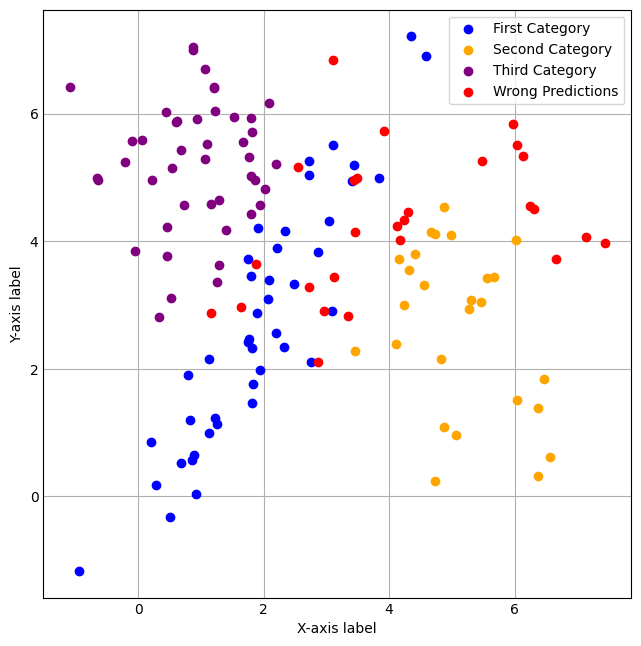

In [100]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')
x = X_train[:, 0]
y = X_train[:, 1]

print(X_train.shape)

first_category = []
second_category = []
third_category = []
wrong_predictions = []

colors=['blue', 'orange', 'purple', 'red']

for i in range(len(y_train)):
    if y_train[i] == x_train_prediction[i] == 1.0 :
        first_category.append(X_train[i])

    elif y_train[i] == x_train_prediction[i] == 2.0:
        second_category.append(X_train[i])

    elif y_train[i] == x_train_prediction[i] == 3.0:
        third_category.append(X_train[i])

    else :
        wrong_predictions.append(X_train[i])

fig, ax = plt.subplots(figsize= (6, 6))
     
ax.scatter(*zip(*first_category), color=colors[0], label='First Category')
ax.scatter(*zip(*second_category), color=colors[1], label='Second Category')
ax.scatter(*zip(*third_category), color=colors[2], label='Third Category')
ax.scatter(*zip(*wrong_predictions), color=colors[3], label='Wrong Predictions')


# Add labels and legend
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')
ax.legend()

# Show the plot
plt.show()